In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [72]:
df = pd.read_csv('home-credit-default-risk/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
missing_values = df.isnull().sum()/len(df)*100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64

In [74]:
cols_to_drop = missing_values[missing_values > 50].index.tolist()
df = df.drop(columns=cols_to_drop)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [76]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [77]:
df = df[df['CODE_GENDER'] != 'XNA']
df['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [78]:
df['YEARS_BIRTH'] = -df['DAYS_BIRTH']/365
df['YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED']/365
df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)
df['YEARS_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: YEARS_BIRTH, Length: 307507, dtype: float64

In [79]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [80]:
num_cols.remove('SK_ID_CURR')
num_cols.remove('TARGET')
target = 'TARGET'

In [81]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

In [82]:
X = df.drop(columns=[target, 'SK_ID_CURR'])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

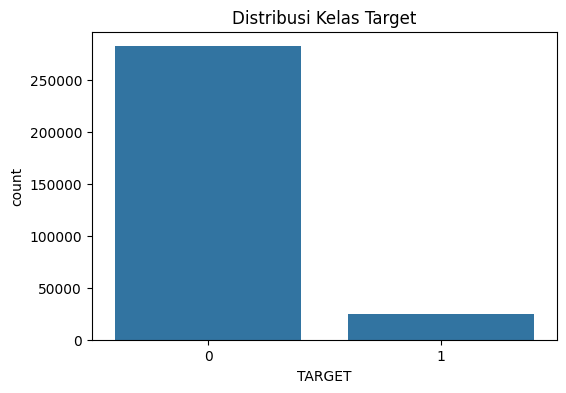

In [83]:
# Distribusi target
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=df)
plt.title('Distribusi Kelas Target')
plt.show()

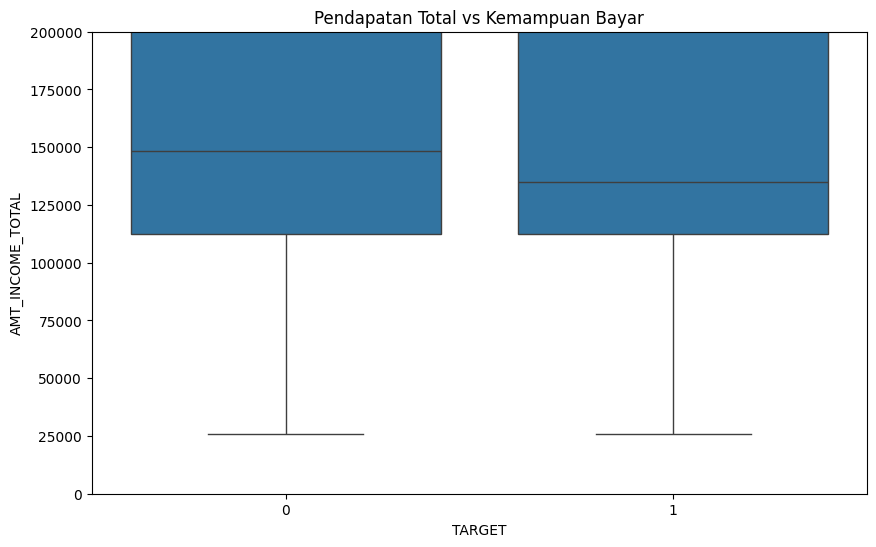

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.ylim(0, 200000)
plt.title('Pendapatan Total vs Kemampuan Bayar')
plt.show()

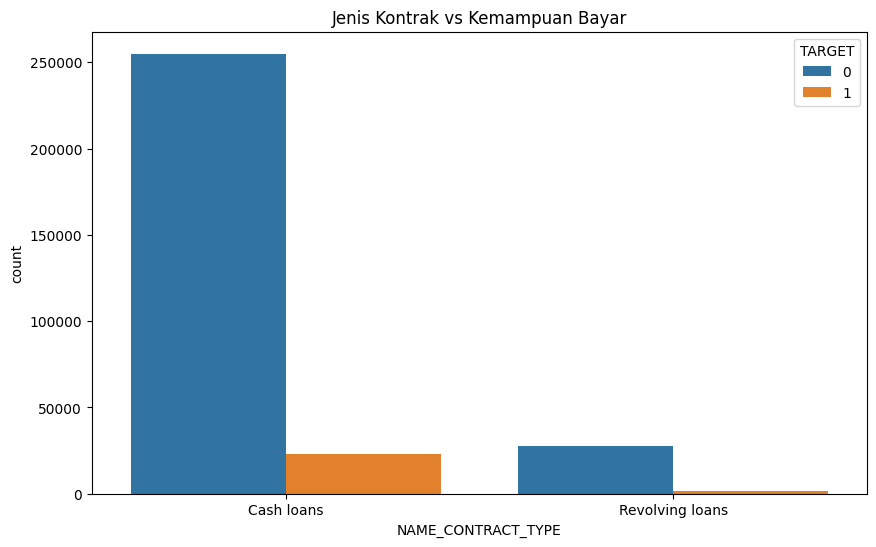

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df)
plt.title('Jenis Kontrak vs Kemampuan Bayar')
plt.show()

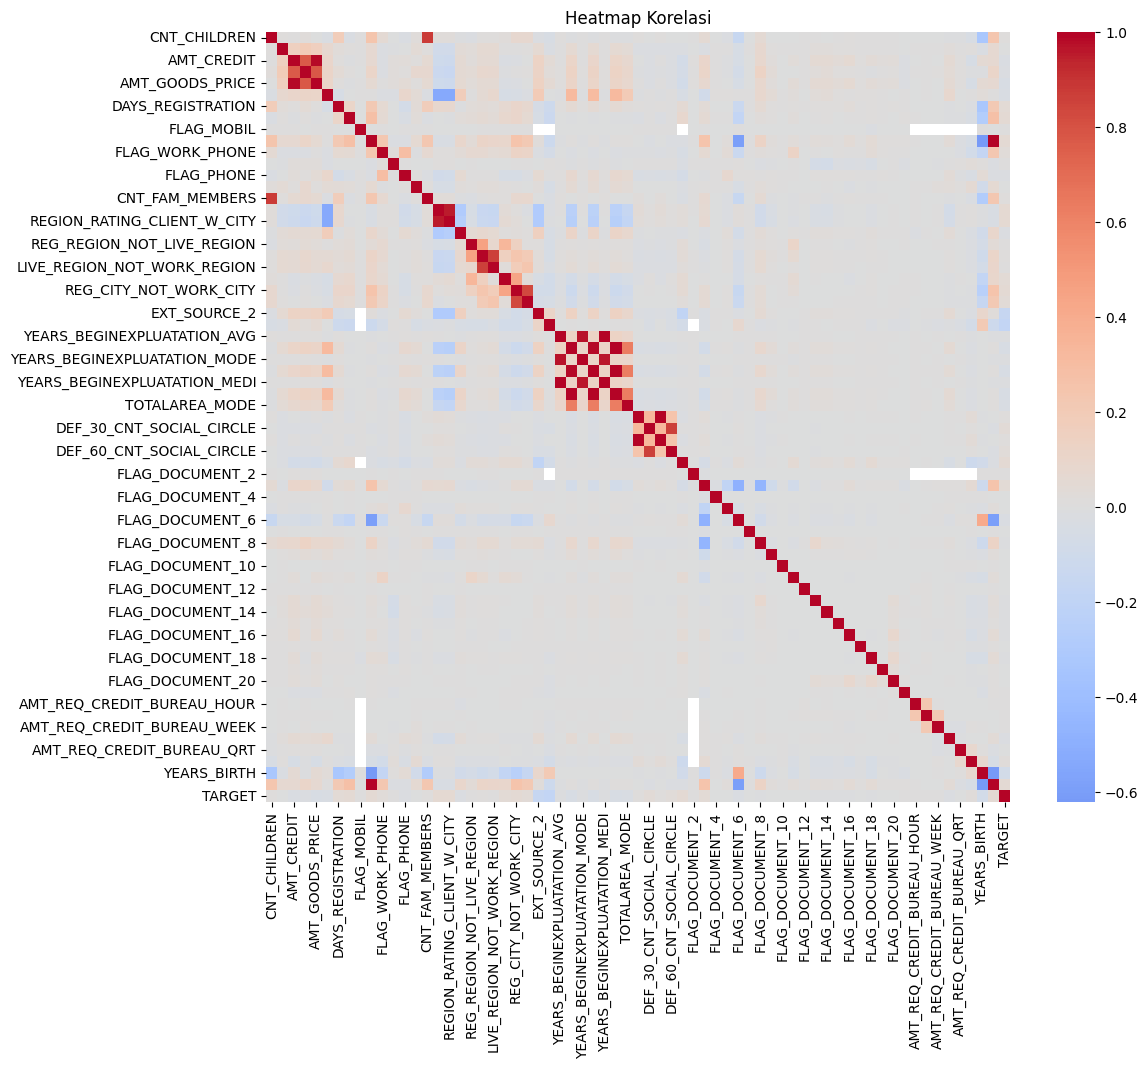

In [86]:
# Korelasi fitur numerik dengan target
corr_matrix = df[num_cols + [target]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
# Model pipeline
lr = Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))])

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:,1]

# Evaluasi
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

c:\Users\Julia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56537
           1       0.16      0.68      0.26      4965

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.90      0.69      0.76     61502

ROC AUC Score: 0.7454020405427091


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56537
           1       0.46      0.00      0.00      4965

    accuracy                           0.92     61502
   macro avg       0.69      0.50      0.48     61502
weighted avg       0.88      0.92      0.88     61502

ROC AUC Score: 0.72140271534076


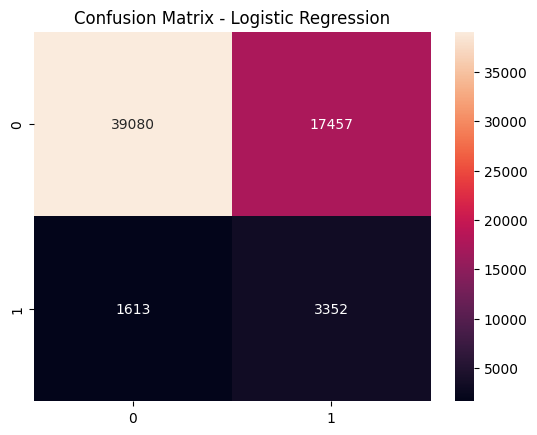

In [111]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

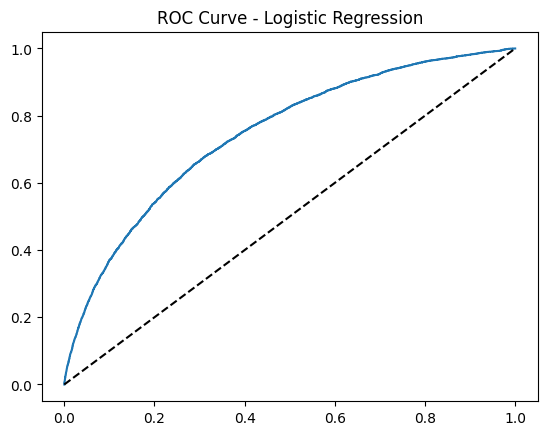

In [112]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.show()

In [113]:
preprocessor = rf.named_steps['preprocessor']
num_features = num_cols

cat_transformer = preprocessor.named_transformers_['cat']
onehot_columns = cat_transformer.named_steps['onehot'].get_feature_names_out(cat_cols)
all_features = np.concatenate([num_features, onehot_columns])

rf_model = rf.named_steps['classifier']
feat_importance = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feat_importance
}).sort_values('Importance', ascending=False)

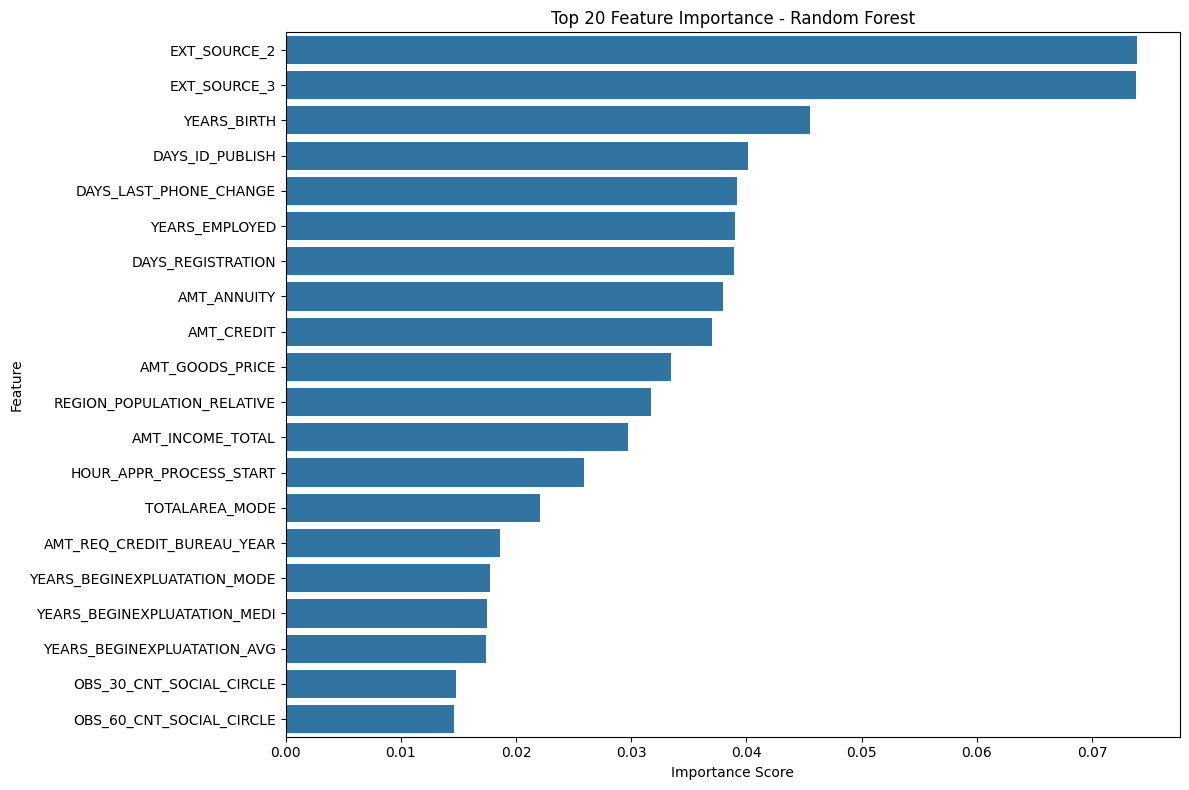

In [114]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()